In [119]:

import numpy as np
import pandas as pd #To read the dataset
import matplotlib.pyplot as plt #Plotting
import time
from IPython import display
%matplotlib inline

In [120]:

dataset = pd.read_csv('grad_desc.csv')
data = dataset.as_matrix()

numInstances = data.shape[0]

dataset.head()

,Temp,Gas Units Sold
0,8,12.4
1,7,22.2
2,6,30.1
3,5,45.4
4,4,59.3


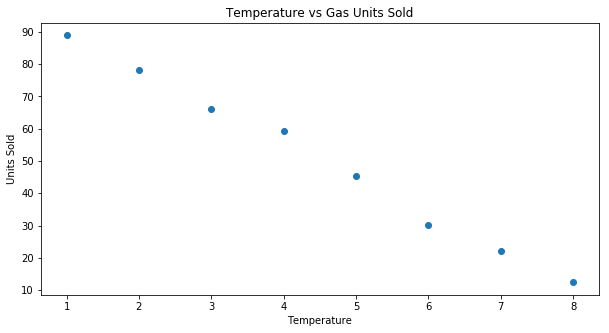

In [121]:
plt.figure(figsize=(10,5))
plt.title('Temperature vs Gas Units Sold')
plt.scatter(x=data[:,0],y=data[:,1])
plt.xlabel('Temperature')
plt.ylabel('Units Sold')
plt.show()

In [122]:

def SSE(m,b,data):
    
    totalError = 0.0
    
    for i in range(numInstances):
        
        temp = data[i,0] #Row i, column 0 -> 'temp'
        gas = data[i,1] #Row i, column 1 -> 'gas sold'
        
        #The real num of gas units
        currentTarget = gas
        
        #Predicted num of gas units with our current fitting line
        #y = mx + b
        currentOutput = m*temp + b
        
        #Compute squared error
        currentSquaredError = (currentTarget - currentOutput)**2

        
        #Add it to the total error
        totalError += currentSquaredError

    sse = totalError/numInstances
    
    return totalError

In [123]:

# Guessing the values of m and b for fitting the line
m = 2
b = 5

sse = SSE(m, b, data)
        
print 'For the fitting line: y = %sx + %s \nSSE: %.2f' %(m,b,sse)

For the fitting line: y = 2x + 5 
SSE: 17853.12


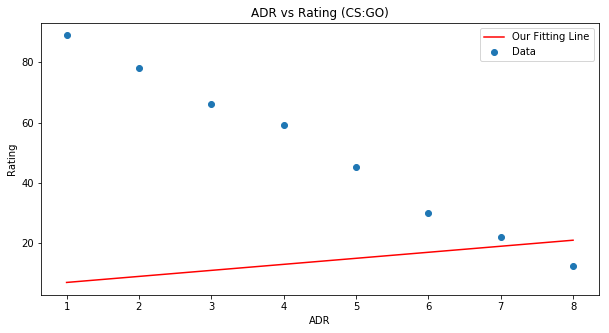

In [124]:

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.set_title('ADR vs Rating (CS:GO)')
ax.scatter(x=data[:,0],y=data[:,1],label='Data')
plt.plot(data[:,0], m*data[:,0] + b,color='red',label='Our Fitting Line')
ax.set_xlabel('ADR')
ax.set_ylabel('Rating')
ax.legend(loc='best')

plt.show()

In [133]:

def gradient_descent_step(m,b,data):
    
    N = numInstances
    m_grad = 1
    b_grad = 1
    
    for i in range(N):

        #Get current pair (x,y)
        x = data[i,0]
        y = data[i,1]

        #Partial derivative respect 'm'
        dm = -(2/N) * x * (y - ((m*x) + b))
        
        #Partial derivative respect 'b'
        db = -(2/N) * (y - ((m*x) + b))    
        
        #Update gradient
        m_grad = m_grad + dm
        b_grad = b_grad + db
    
    #Set the new 'better' updated 'm' and 'b'
    m_updated = m - 0.01*m_grad
    b_updated = b - 0.01*b_grad
    
    #Important note: The value '0.0001' that multiplies the 'm_grad' and 'b_grad' is the learning rate.
    
    return m_updated,b_updated

In [134]:

# Trying out SSE and gradient descent

sse = SSE(m,b,data)

print('Starting line: y = %.2fx + %.2f - Error: %.2f' %(m,b,sse))

for i in range(2):
    m,b = gradient_descent_step(m,b,data)
    sse = SSE(m,b,data)
    print('At step %d - Line: y = %.2fx + %.2f - Error: %.2f' %(i+1,m,b,sse))

print('\nBest  line: y = %.2fx + %.2f - Error: %.2f' %(m,b,sse))

Starting line: y = 1.00x + 1.00 - Error: 22308.12
At step 1 - Line: y = 0.99x + 0.99 - Error: 22337.38
At step 2 - Line: y = 0.98x + 0.98 - Error: 22366.70

Best  line: y = 0.98x + 0.98 - Error: 22366.70


In [135]:
def gradient_descent_n_steps(m_starting,b_starting,data,steps): #For doing it many times in an easy way ;)
    print('Starting line: y = %.6fx + %.6f - Error: %.6f\n' %(m_starting,b_starting,SSE(m_starting,b_starting,data)))
    m = m_starting
    b = b_starting
    display_freq = steps//10
    for i in range(steps):
        m,b = gradient_descent_step(m,b,data)
        if(i % display_freq == 0):
            sse = SSE(m,b,data)
            print('At step %d - Line: y = %.6fx + %.6f - Error: %.6f' %(i+1,m,b,sse))
    
    
    print('\nBest  line: y = %.6fx + %.6f - Error: %.6f' %(m,b,sse))
    return m,b

In [136]:

# Define Hyperparameters (can be randomly generated)
M_STARTING = 0
B_STARTING = 0
NUM_STEPS = 1000

In [137]:
m_best,b_best = gradient_descent_n_steps(M_STARTING, B_STARTING, data, NUM_STEPS)

Starting line: y = 0.000000x + 0.000000 - Error: 25515.520000

At step 1 - Line: y = -0.010000x + -0.010000 - Error: 25550.462400
At step 101 - Line: y = -1.010000x + -1.010000 - Error: 29331.542400
At step 201 - Line: y = -2.010000x + -2.010000 - Error: 33680.622400
At step 301 - Line: y = -3.010000x + -3.010000 - Error: 38597.702400
At step 401 - Line: y = -4.010000x + -4.010000 - Error: 44082.782400
At step 501 - Line: y = -5.010000x + -5.010000 - Error: 50135.862400
At step 601 - Line: y = -6.010000x + -6.010000 - Error: 56756.942400
At step 701 - Line: y = -7.010000x + -7.010000 - Error: 63946.022400
At step 801 - Line: y = -8.010000x + -8.010000 - Error: 71703.102400
At step 901 - Line: y = -9.010000x + -9.010000 - Error: 80028.182400

Best  line: y = -10.000000x + -10.000000 - Error: 80028.182400


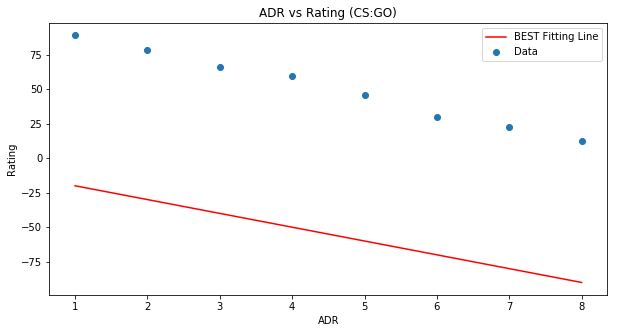

In [138]:

m=m_best
b=b_best
x = data[:,0]

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.set_title('ADR vs Rating (CS:GO)')
ax.scatter(x=x,y=data[:,1],label='Data')
plt.plot(x, m*x + b,color='red',label='BEST Fitting Line')
ax.set_xlabel('ADR')
ax.set_ylabel('Rating')
ax.legend(loc='best')

plt.show()

In [ ]:

# Visualising the error

def error_plot(fig,ax,error_list,error,data,step):
    #PLOT2

    ax.cla()
    
    ax.set_title('Error (step %d)' % step)
    ax.set_xlabel('Iteration number')
    ax.set_ylabel('Error')
    
    ax.plot(np.arange(0,len(error_list)),error_list)    
    fig.canvas.draw()
    
def gradient_descent_n_steps_with_error_plot(m_starting,b_starting,data,steps): #For doing it many times in an easy way ;)
    
    fig,ax = plt.subplots(1,1,figsize=(10,7))
    
    m = m_starting
    b = b_starting
    error_list = list()
    
    
    error = SSE(m,b,data)
    error_list.append(error)
    
    plt.cla()
    for i in range(steps):
        step = i
        error_plot(fig,ax,error_list,error,data,step)
        
        m,b = gradient_descent_step(m,b,data)
        error = SSE(m,b,data)
        error_list.append(error)
        
        time.sleep(10/steps)
        plt.cla()
        #############
            
    error_plot(fig,ax,error_list,error,data,step)
#end def

#RUN IT!

m = 1
b = 1
steps = 10
gradient_descent_n_steps_with_error_plot(m,b,data,steps)